In [2]:
# Importing required modules 

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from textblob import TextBlob 
from wordcloud import WordCloud
import numpy as np  
import pandas as pd
import string
%matplotlib inline

# Finding Sentiment Using TextBlob

In [12]:
# defining the sentiment analyserusing textblob

def get_sentiment(review): 

    analysis = TextBlob(review) 
    
    if analysis.sentiment.polarity > 0: 
        return ('Positive and The Sentiment Score is', analysis.sentiment.polarity)
    elif analysis.sentiment.polarity == 0: 
        return ('Neutral and The Sentiment Score is', analysis.sentiment.polarity)
    else: 
        return ('Negative and The Sentiment Score is', analysis.sentiment.polarity)

In [4]:
# Loading required data
book=pd.read_csv("Elon_musk.csv",error_bad_lines=False, encoding='cp1252', index_col = 0)

In [5]:
book

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
# remove both the leading and the trailing characters
book = [Text.strip() for Text in book.Text] 

# removes empty strings
book = [Text for Text in book if Text] 

book[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
# Joining the list into single string
text = ' '.join(book)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [8]:
#Removing Punctuations and other special characters

no_punc_text = text.translate(str.maketrans('@/123456789\n', '            ', string.punctuation))

#with arguments (x, y, z) where 'x' and 'y' must be equal-length strings
# characters in 'x' are replaced by characters in 'y'. 
# 'z' is a string (string.punctuation here)
type(no_punc_text)

str

In [13]:
# passing the string through earlier defined function: 

get_sentiment(no_punc_text)

('Positive and The Sentiment Score is', 0.18521153612816282)

# Finding Sentiment Using  Vader Lexicon

In [14]:
# Loading vader sentiment analyser from NLTK

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
# As the data is ready for processing we can directly pass the data analyser

sia = SentimentIntensityAnalyzer()

a = no_punc_text

sia.result = sia.polarity_scores(a)

print('\n')
print(sia.result)
print('\n')
print('The sentiment is :', 'Positive' if sia.result['compound']>0 else 'Negative', 
      '\n\nAnd the score is :', sia.result['compound'])



{'neg': 0.048, 'neu': 0.769, 'pos': 0.183, 'compound': 1.0}


The sentiment is : Positive 

And the score is : 1.0


# Creating Word Cloud

In [19]:
# Importing required Modules

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
# Splitting the cleaned data into individual words 

elon_rev = no_punc_text.split(' ')

In [21]:
# Loading given positive words data 

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
poswords = poswords[36:]

In [22]:
# loading the negative words data

with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]


In [23]:
# Loading the stop words

with  open('stop.txt', 'r') as h:
    stops = h.readlines()[0:]


In [24]:
# Removing the stop words from the word cospus

elon_words = [word for word in elon_rev if not word in stops]

# and joing them to single string

elon_string = " ".join(elon_words)

len(elon_string)

148095

In [25]:
# selecting the postive words from the tweet data

elon_pos = [word for word in elon_rev if word in poswords]

# And joing them tostring 

elon_pos_string = " ".join(elon_pos)



In [26]:
# selecting the negative words and joing them

elon_neg_string = " ".join([word for word in elon_rev if word in  negwords])


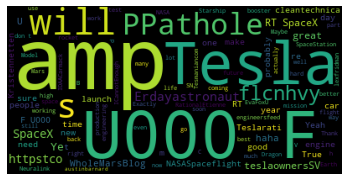

In [30]:
# Creating top 100 words cloud with all words other than stop words 

wordcloud_ip = WordCloud(
                      background_color='Black',
                      max_words = 100
                     ).generate(elon_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

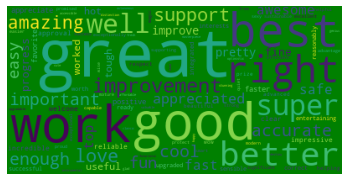

In [33]:
# Creating top 100 positive words cloud  

wordcloud_ip = WordCloud(
                      background_color='green',
                      max_words = 100,
                     ).generate(elon_pos_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

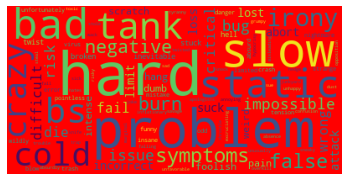

In [35]:
# Creating top 100 negative words cloud  

wordcloud_ip = WordCloud(
                      background_color='red',
                      max_words = 100,    
                     ).generate(elon_neg_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [47]:
# Creating word cloud and masking musk using mask arry

from PIL import Image

maskArray = np.array(Image.open("emusk.png"))

cloud = WordCloud(background_color = "white", max_words = 100, mask = maskArray)

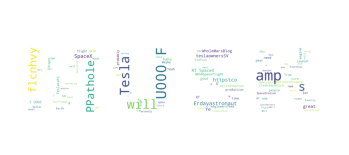

In [49]:
cloud.generate(elon_string)


plt.axis("off")
plt.imshow(cloud)

plt.show()